# Basic Adaptive Policy Trial

In [117]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
import matplotlib.pyplot as plt

In [119]:
%cd /Users/dominikmeier/Nextcloud/Studium/MT/WIP/code
from src import simulation
from src.examples import load_basic_simulation, load_sinot_simulation
from src.policy import ConstantPolicy, FixedPolicy, FrequentistExploreThenCommit

/Users/dominikmeier/Nextcloud/Studium/MT/WIP/code


In [120]:
simulation = load_basic_simulation()

In [121]:
simulation.step()

In [122]:
simulation.history

History(observations=[Observation(context={'c': -1.00527737352683}, treatment=Treatment(i=1), outcome=Outcome())])

<Axes: ylabel='primary_outcomes'>

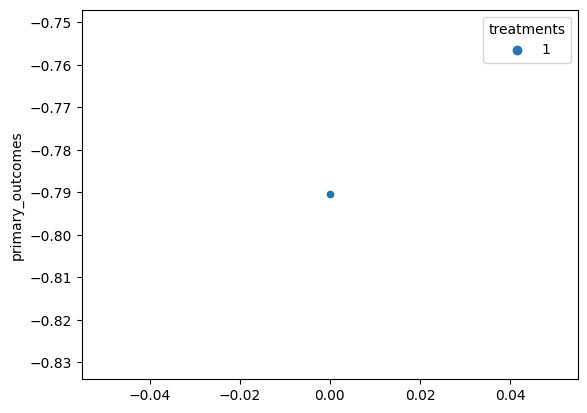

In [123]:
ax = plt.axes()
simulation.history.plot(ax)

/Users/dominikmeier/Nextcloud/Studium/MT/WIP/code


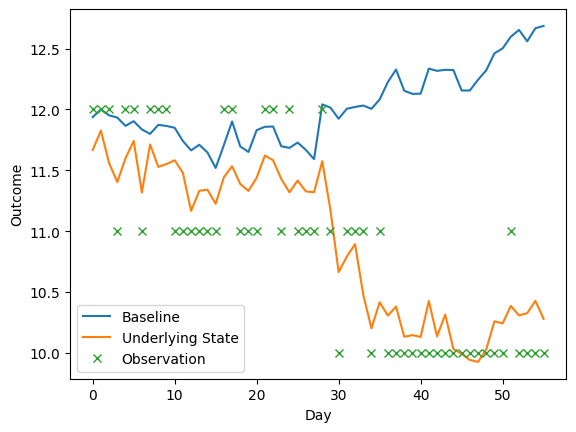

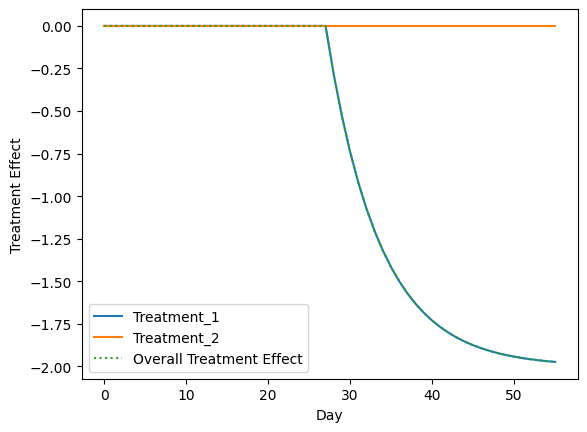

In [124]:
import json

%cd /Users/dominikmeier/Nextcloud/Studium/MT/WIP/code
from sinot.simulation import Simulation as SinotSimulation

# Load example params
with open("sinot/example/example_params.json") as fp:
    study_params = json.load(fp)

# Drop out fraction to simulate drop out
drop_out = {"fraction": 1, "vacation": 0}

# study design defines the order of treatmens. None indicates no-treatment was given
treatment = "Treatment_1"
days_per_period = 28

sim = SinotSimulation(study_params)
pat_complete, _ = sim.step_patient(
    None, days_per_period, drop_out=drop_out, first_day="2018-01-01"
)
pat_complete, _ = sim.step_patient(
    "Treatment_1", days_per_period, drop_out=drop_out, data=pat_complete
)

sim.plot_patient(pat_complete)

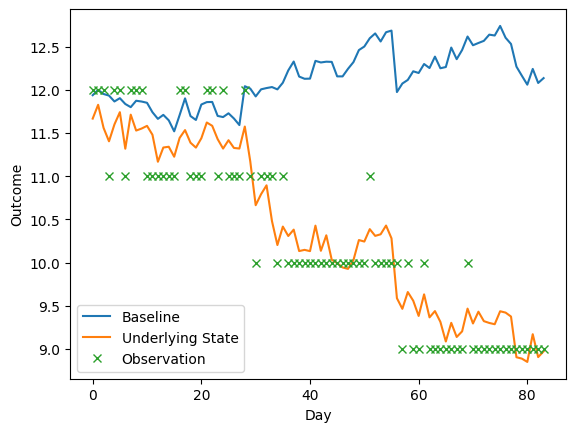

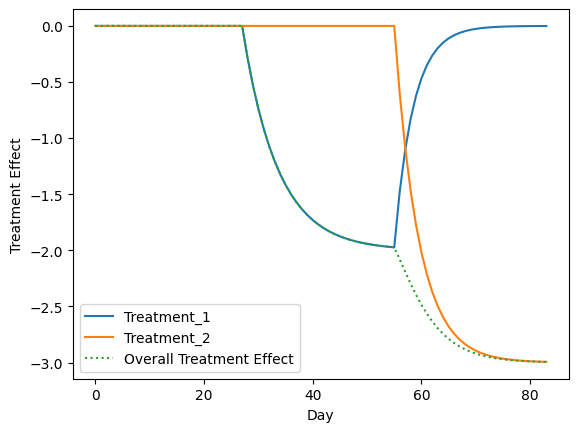

In [125]:
pat_complete, _ = sim.step_patient(
    "Treatment_2", days_per_period, drop_out=drop_out, data=pat_complete
)
sim.plot_patient(pat_complete)

In [126]:
pat_complete.iloc[-1:]

,patient_id,block,date,day,treatment,Activity,Treatment_1,Treatment_1_effect,Treatment_2,Treatment_2_effect,baseline_drift,underlying_state,Uncertain_Low_Back_Pain
83,0,3,2018-03-25,84,Treatment_2,3383.636907,0.0,-0.000626,1.0,-2.994197,12.135521,8.971515,9.0


# SinotSimulation

In [127]:
%cd /Users/dominikmeier/Nextcloud/Studium/MT/WIP/code
simulation_1 = load_sinot_simulation(
    file_path="sinot/example/example_params.json",
    policy=ConstantPolicy(action=1, number_of_actions=2),
)
simulation_2 = load_sinot_simulation(
    file_path="sinot/example/example_params.json",
    policy=ConstantPolicy(action=2, number_of_actions=2),
)
simulation_fixed = load_sinot_simulation(
    file_path="sinot/example/example_params.json",
    policy=FixedPolicy(number_of_actions=2, block_length=28),
)
simulation_etc = load_sinot_simulation(
    file_path="sinot/example/example_params.json",
    policy=FrequentistExploreThenCommit(
        number_of_actions=2, block_length=10, explore_blocks=4
    ),
)

/Users/dominikmeier/Nextcloud/Studium/MT/WIP/code


In [128]:
for _ in range(100):
    simulation_1.step()
    simulation_2.step()
    simulation_fixed.step()
    simulation_etc.step()

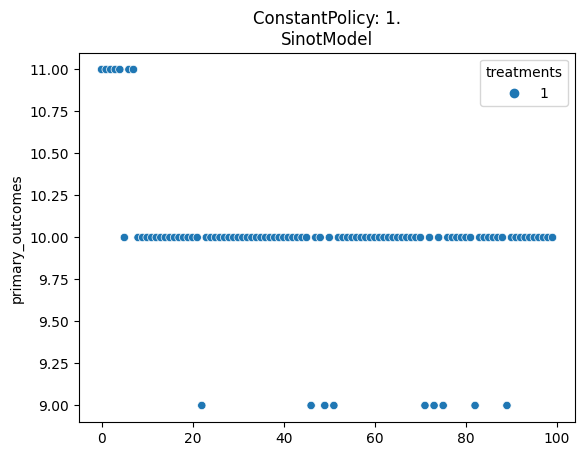

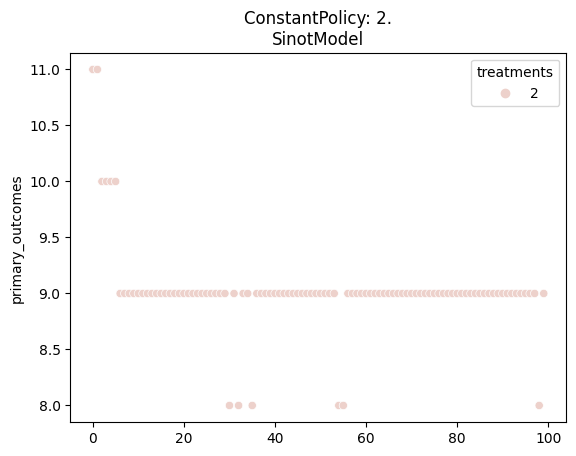

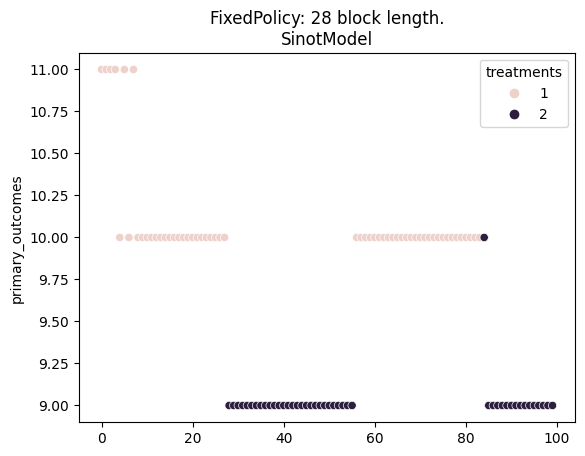

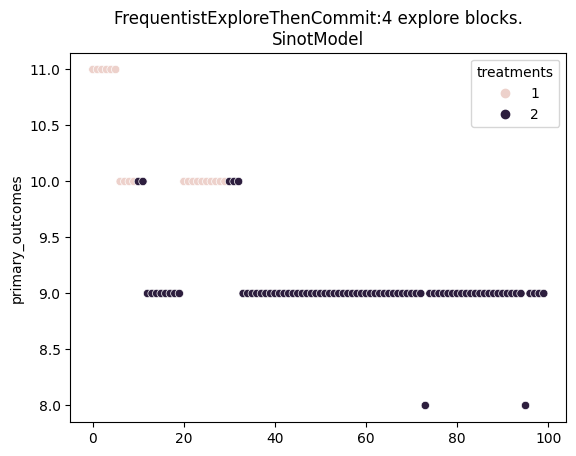

In [129]:
plt.figure()
simulation_1.plot()
plt.figure()
simulation_2.plot()
plt.figure()
simulation_fixed.plot()
plt.figure()
simulation_etc.plot()

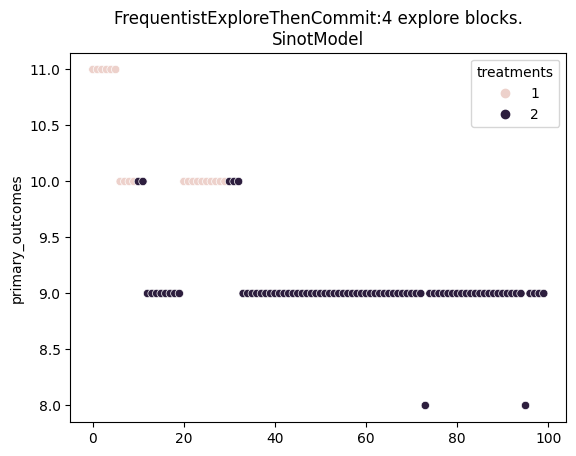

In [130]:
plt.figure()
simulation_etc.plot()

In [131]:
from src.metric import plot_score, SimpleRegret, FrequentistOptimalSelection, score_df

simulations = [
    simulation_etc,
    simulation_1,
    simulation_2,
    simulation_fixed,
    simulation_fixed,
    simulation_fixed,
    simulation_fixed,
    simulation_fixed,
]
metrics = [SimpleRegret(), FrequentistOptimalSelection()]

score_df(simulations, metrics)

,Simulation,Metric,Score
0,Simulation\nFrequentistExploreThenCommit:4 exp...,Simple Regret,9.29
1,Simulation\nConstantPolicy: 1.\nSinotModel\n,Simple Regret,9.98
2,Simulation\nConstantPolicy: 2.\nSinotModel\n,Simple Regret,9.02
3,Simulation\nFixedPolicy: 28 block length.\nSin...,Simple Regret,9.63
4,Simulation\nFixedPolicy: 28 block length.\nSin...,Simple Regret,9.63
5,Simulation\nFixedPolicy: 28 block length.\nSin...,Simple Regret,9.63
6,Simulation\nFixedPolicy: 28 block length.\nSin...,Simple Regret,9.63
7,Simulation\nFixedPolicy: 28 block length.\nSin...,Simple Regret,9.63
8,Simulation\nFrequentistExploreThenCommit:4 exp...,Optimal Selection,1.00
9,Simulation\nConstantPolicy: 1.\nSinotModel\n,Optimal Selection,0.00


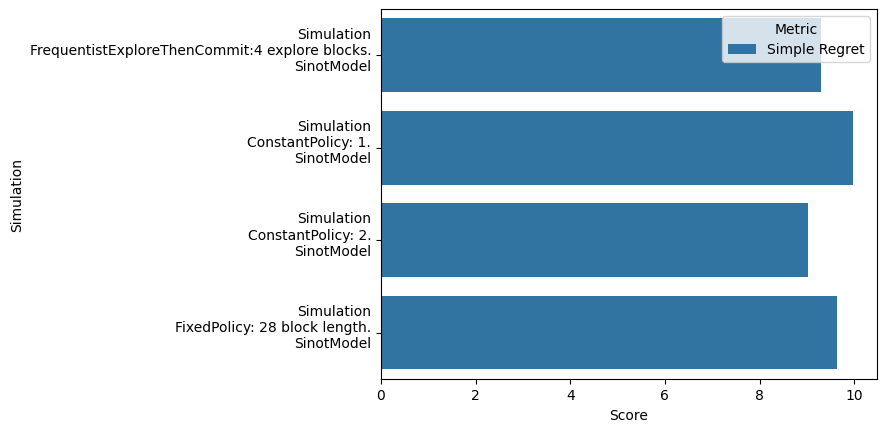

In [132]:
plot_score(simulations, [SimpleRegret()])